1. add_newgame_dir 제작
- 파일 경로 중 Data - Game_package_data - [Game_name] 만드는 역할.
- Data - Game_list.txt 에서 정보 읽고 패키지 정보 저장 위치 저장함.

2. save_calculation 제작
- 효율 계산한 결과 Game_package_data - [Game_name] 에 저장하는 역할.

In [1]:
import os
import pandas as pd
import numpy as np

file = pd.read_csv("Data/Game_list.txt", sep=",", encoding="UTF8")

file

,Null,Genshin_impact,Punishing_gray_raven,Blue_archive,temp_game_1,temp_game_2
0,0,Data/Game_package_data/Genshin_impact,Data/Game_package_data/Punishing_gray_raven,Data/Game_package_data/Blue_archive,Data/Game_package_data/temp_game_1,Data/Game_package_data/temp_game_2


편의 위해 함수 제작

In [2]:
# read or save csv as UTF8 encoding and index=False
from pandas import DataFrame

def read_csv(filepath : str) : 
    """Read csv file as UTF8 encoding.

    Args:
        filepath (str) : directory of csv file.

    Returns:
        pd.read_csv(filepath, sep=",", encoding="UTF8")
    """
    import pandas as pd
    return pd.read_csv(filepath, sep=",", encoding="UTF8")
def save_csv(Data : DataFrame, filepath : str) : 
    """Save csv file as UTF8 encoding.

    Args:
        Data (DataFrame) : data build by DataFrame.
        filepath (str) : directory of csv file.

    Returns:
        Data.to_csv(filepath, sep=",", encoding="UTF8", index=False)
    """
    return Data.to_csv(filepath, sep=",", encoding="UTF8", index=False)


In [3]:
# return [Data - Game_package_data - Game_name] directory
def return_data_dir(Game_name : str) -> str: 
    """Returns [Game_name]'s data directory.
    
    - Data 
        - Game_package_data 
            - Game_name

    Args:
        Game_name (str) : name of game.

    Returns:
        pd.read_csv("Data/Game_list.txt", sep=",", encoding="UTF8")[Game_name].values[0] 
            --> Data - Game_package_data - Game_name
    """
    import pandas as pd
    return pd.read_csv("Data/Game_list.txt", sep=",", encoding="UTF8")[Game_name].values[0]


In [4]:
# creates [ ./Data/Game_package_data/Game_name ] : creates only one directory
def add_game_data_dir(Data_dir : str, Game_name : str) -> None: 
    """Only creates new game directory and saves to Game_list.txt
    
    If some game's package data directory is already exist, function do nothing.

    Directory that function creates : 
    - Current directory
        - Data
            - Game_package_data
                - Game_name
    
    Args:
        Data_dir (str) : [ ./Data ]
        Game_name (str) : name of game.
    """
    import os
    import pandas as pd
    
    dir_package_data = Data_dir + "/Game_package_data"
    
    game_list = read_csv(Data_dir + "/Game_list.txt")
    
    if Game_name in os.listdir(dir_package_data) : 
        print(f"[{Game_name}]'s data looks like already exist at {dir_package_data}")
        print(os.listdir(dir_package_data))
        return
    
    dir_game = dir_package_data + "/" + Game_name
    os.mkdir(dir_game)
    
    if Game_name in game_list.keys() : 
        game_list = game_list.drop([Game_name], axis=1)
    
    game_list = pd.concat([game_list, 
                           pd.Series(data=dir_game, name=Game_name)
                           ], axis=1)
    
    save_csv(Data=game_list, filepath=Data_dir + "/Game_list.txt")
    print(f"[{Game_name}] data directory has been created.")


In [5]:
# creates [ ./Data/Game_list.txt ] with input Game_name_list
def create_game_list(Game_name_list : list) -> None: 
    """creates [ ./Data/Game_list.txt ] with input Game_name_list

    Args:
        Game_name_list (list): list of game names
    """
    import os
    import pandas as pd

    gmae_list_dir = "Data/Game_list.txt"

    if os.path.isfile(gmae_list_dir) : 
        print("Game_list.txt already exist.")
    
    else : 
        data_dir_list = [0]
        game_name_list = ["Null"]
        for name in Game_name_list : 
            data_dir_list.append("Data/Game_package_data/" + name)
            game_name_list.append(name)
        
        save_csv(Data=pd.DataFrame(data=[data_dir_list], columns=game_name_list), filepath=gmae_list_dir)
        print(f"Game_list.txt has been created. --> [ ./Data/Game_list.txt ] : {Game_name_list}")


In [6]:
# add input DataFrame in [ ./Data/Game_list.txt ]
from pandas import DataFrame

def add_game_list(Data : DataFrame) -> None: 
    """Add input DataFrame with [ ./Data/Game_list.txt ]

    If there's same data in [ /Game_list.txt ] and Data, function will overwrite [ /Game_list.txt ] as Data
    
    [ /Game_list.txt ] must be stored by columns=[list of games] --> shape=(1,N)
    
    Therefore, input DataFrame must be shape=(1,N)
    
    Args:
        Data (DataFrame) : _description_
    """
    import pandas as pd
    
    if type(Data) != type(pd.DataFrame()) : 
        print(f"Args Data must be dataframe. --> [ Data : {type(Data)} ]")
        return
    
    prev = read_csv("Data/Game_list.txt")
    
    for game in Data.keys() : 
        if game in prev.keys() : 
            prev = prev.drop([game], axis=1)
    
    current = pd.concat([prev, Data], axis=1)
    save_csv(current, "Data/Game_list.txt")


In [7]:
# Deletes [ ./Data/Game_list.txt ] and creates new one
def delete_game_list() -> None: 
    """Deletes [ ./Data/Game_list.txt ] and creates new one.
    """
    import os
    import pandas as pd
    
    game_list_dir = "Data/Game_list.txt"
    
    if not os.path.isfile(game_list_dir) : 
        print("Game_list.txt doesn't exist.")
    
    else : 
        os.remove(game_list_dir)
        save_csv(pd.DataFrame(data=[0], columns=["Null"]), game_list_dir)
        print("Game_list.txt has been deleted and created.")


In [8]:
# save input DataFrame to [ ./Data/Game_package_data/Game_name/Calculation_Game_name.txt ]
def save_calculation(Calc_dataframe : DataFrame, Game_name : str, Force=False) -> bool: 
    """Save pacakge's calculation
    
    Directory that data stored : 
    - Data
        - Game_package_data
            - Game_name
                - Calculation_Game_name.txt

    Args:
        Calc_dataframe (DataFrame) : calculated DataFrame.
        Game_name (str) : name of game.
        Force (bool) : force to save data though already exist.
    """
    import os
    
    game_dir = return_data_dir(Game_name)
    
    if type(Calc_dataframe) != type(DataFrame()) : 
        print(f"Args Calc_dataframe must be dataframe. --> [ Calc_dataframe : {type(Calc_dataframe)} ]")
        return False
    
    game_dir = game_dir + "/Calculation_" + Game_name + ".txt"
    
    if os.path.isfile(game_dir) : 
        print(f"[{Game_name}]'s data looks like already exist at {game_dir}")
        if not Force :
            return False
        print("Forcing to save data...")
    
    save_csv(Data=Calc_dataframe, filepath=game_dir)
    print(f"[{Game_name}] calculation data has been saved.")
    return True


In [9]:
# deltes [ ./Data/Game_package_data/Game_name/Calculation_Game_name.txt ]
def delete_calculation(Game_name : str) -> None: 
    """Deletes [ ./Data/Game_package_data/Game_name/Calculation_Game_name.txt ]
    - the calculation data of Game_name

    Args:
        Game_name (str): name of game.
    """
    import os

    game_dir = return_data_dir(Game_name=Game_name)
    calc_dir = game_dir + "/Calculation_" + Game_name + ".txt"
    
    os.remove(calc_dir)
    print(f"[{Game_name}]'s calculation data has been deleted.")


In [10]:
# save input DataFrame to [ ./Data/Game_package_data/Game_name/Package_data_Game_name.txt ]
def save_package_data(Package_dataframe : DataFrame, Game_name : str, Force=False) -> None: 
    """Save package data.

    Package data must be sotred with two columns : --> ["Package_name", "Value", "Price"]
    
    Therefore your input DataFrame should be shape=(N,3).
    
    Args:
        Package_dataframe (DataFrame) : package data with shape=(N,3).
        Game_name (str) : name of game.
        Force (bool, optional) : force to save data though already exist. Defaults to False.
    """
    import os
    
    game_dir = return_data_dir(Game_name=Game_name)
    
    if type(Package_dataframe) != type(DataFrame()) : 
        print(f"Args Package_dataframe must be dataframe. --> [ Package_dataframe : {type(Package_dataframe)} ]")
        return
    
    game_dir = game_dir + "/Package_data_" + Game_name + ".txt"
    
    if os.path.isfile(game_dir) : 
        print(f"[{Game_name}]'s data looks like already exist at [ /{game_dir} ]")
        if not Force :
            return
        print("Forcing to save data...")
    
    save_csv(Data=Package_dataframe, filepath=game_dir)
    print(f"[{Game_name}] package data has been saved.")


In [11]:
# add input DataFrame with [ ./Data/Game_package_data/Game_name/Package_data_Game_name.txt ]
def add_package_dataframe(Package_dataframe : DataFrame, Game_name : str) -> None: 
    """Add package data.

    Package data are stored with two columns : --> ["Package_name", "Value", "Price"]
    
    Therefore your input DataFrame should be shpae=(N,3)
    
    Args:
        Package_dataframe (DataFrame) : package data with sahpe=(N,3).
        Game_name (str) : name of game.
    """
    import os
    import numpy as np
    import pandas as pd
    
    game_dir = return_data_dir(Game_name=Game_name)
    
    package_dir = game_dir + "/Package_data_" + Game_name + ".txt"
    
    prev_data = read_csv(package_dir).values
    new_data = Package_dataframe.values
    
    data_stack = np.vstack((prev_data, new_data))
    current_data = pd.DataFrame(data=data_stack, columns=Package_dataframe.keys())
    
    save_csv(current_data, package_dir)
    print(f"[{Game_name}] package data has been created.")


In [12]:
# delete input package data in [ ./Data/Game_package_data/Game_name/Package_data_Game_name.txt ]
def delete_package(Game_name : str, Package_name : str, Force=False) -> None: 
    """Delete specific package.

    Args:
        Game_name (str) : name of game.
        Package_name (str) : name of package.
        Force (bool, optional) : force to delete every data. Defaults to False.
    """
    game_dir = return_data_dir(Game_name=Game_name)
    
    package_dir = game_dir + "/Package_data_" + Game_name + ".txt"
    
    package_data = read_csv(package_dir)
    
    del_index = package_data.index[package_data['name'] == Package_name]
    
    if len(del_index) > 1 : 
        print(f"There are multiple packages that named [ {Package_name} ] in data.")
        if not Force : 
            return
        print("Forcing to delete data...")
    
    del_index = sorted(del_index, reverse=True)
    
    for index in del_index : 
        package_data = package_data.drop(index=index)
    
    save_csv(package_data, package_dir)
    print(f"[{Game_name}] package data [{Package_name}] has been deleted.")


In [13]:
# creates every essential game directories
# if there is something in Game_name_list, creates directory including it.
# if Game_name_list is None, creates directories by [ ./Data/Game_list.txt ]
# if Force=True, deletes every directories and make new one
def create_data_dir(Force=False, Game_name_list=False) -> None: 
    """Creates every essential directories like : [ ./Data, ./Data/Game_list.txt, ./Data/Game_package_data, ... ]

    1\. If Force=True, function deletes stored data and create new one. If not, function only creates directories that missing.
    - [ ./Data ]
    - [ ./Data/Game_list.txt ] 
    - [ ./Data/Game_package_data ]
    
    2\. If Game_name_list=False, function doesn't create sub directories like : 
    - [ /Game_package_data/Calculation_Game_name.txt ]
    - [ /Game_package_data/Package_data_Game_name.txt ]
    
    3\. If Game_name_list iterable, function will add Game_name_list to [ ./Data/Game_list.txt ] and create sub directories :
    - add new game list to [ /Game_list.txt ]
    - [ /Game_package_data/Calculation_Game_name.txt ]
    - [ /Game_package_data/Package_data_Game_name.txt ]
    
    4\. If Game_name_list=None, function only creates sub directories that already exist in [ ./Data/Game_list.txt ] : 
    - [ /Game_package_data/Calculation_Game_name.txt ]
    - [ /Game_package_data/Package_data_Game_name.txt ]
    
    Args:
        Force (bool, optional) : force to delete stored data and creates new one. Defaults to False.
        Game_name_list (bool, optional) : list of games to create directories. Defaults to False.
    """
    import os
    import pandas as pd
    
    game_list = True

    if Force : 
        if not Game_name_list : 
            print("Game_name_list must be considered when forcing to make directory")
            print(f"Please input iterable object likewise List --> [ Gmae_name_list : {type(Game_name_list)}]")
            return
        
        import shutil
        print("Forcing to make new directories...")
        print("--> [ ./Data, ./Data/Game_list.txt, ./Data/Game_package_data ]")
        
        shutil.rmtree("Data")
        os.makedirs("Data", exist_ok=True)
        print("[./Data] directory has been made.")

        game_dir_list = ["Data/Game_package_data/" + name for name in Game_name_list]
        save_csv(Data=pd.concat([
            pd.DataFrame(data=[0], columns=["Null"]), 
            pd.DataFrame(data=[game_dir_list], columns=Game_name_list)], 
            axis=1
            ),
            filepath="Data/Game_list.txt"
        )
        print("[./Data/Game_list.txt] directory has been made.")

        os.makedirs("Data/Game_package_data", exist_ok=True)
        print("[./Data/Game_package_data] directory has been made.")

        print()
        for name in Game_name_list : 
            add_game_data_dir("Data", name)
            save_calculation(pd.DataFrame(), Game_name=name)
            save_package_data(pd.DataFrame(), Game_name=name)
            print()
        return
    
    else : 
        if not os.path.isdir("Data") : 
            print("Directory [ ./Data ] doesn't exist. Create new one.")
            os.mkdir("Data")
        else : 
            print("[./Data] directory already exist.")
        
        if not os.path.isfile("Data/Game_list.txt") : 
            print("Directory [ ./Data/Game_list.txt ] doesn't exist. Create new one.")
            save_csv(pd.DataFrame(data=[0], columns=["Null"]), "Data/Game_list.txt")
            game_list = False
        else : 
            print("[./Data/Game_list.txt] directory already exist.")
        
        if not os.path.isdir("Data/Game_package_data") : 
            print("Directory [ ./Data/Game_package_data ] doesn't exist. Create new one.")
            os.mkdir("Data/Game_package_data")
        else : 
            print("[./Data/Game_package_data] directory already exist.")

        if not Game_name_list and Game_name_list is not None: 
            return
    
    if Game_name_list is not None : 
        game_dir_list = ["Data/Game_package_data/" + name for name in Game_name_list]
        add_game_list(
            pd.DataFrame(data=[game_dir_list], columns=Game_name_list)
        )
    
    dir_game_package_data = "Data/Game_package_data"

    game_list = read_csv("Data/Game_list.txt").drop(["Null"], axis=1)

    print()
    for name in game_list.keys() : 
        dir_game = dir_game_package_data + "/" + name
        if not os.path.isdir(dir_game) : 
            add_game_data_dir("Data", Game_name=name)
            save_calculation(pd.DataFrame(), Game_name=name)
            save_package_data(pd.DataFrame(), Game_name=name)
            print()


In [14]:
# load the package data at [ /Game_pacakge_data/Game_name/Package_data_Game_name.txt ]
# and calculate package efficiency (value per price),
# saved to [ /Game_pacakge_data/Game_name/Calculation_Game_name.txt ]
def calc_package_eff(Game_name : str, Game_data_dir : str, Force=True) -> None: 
    """Calculate efficiency by [ /Game_name/Package_data_Game_name.txt ] and save to [ /Game_name/Calculation_Game_name.txt ]
    
    Load data from : 
    - [ /Game_package_data ]
        - [ /Game_name ]
            - [ /Package_data_Game_name.txt ]
    
    Save data to : 
    - [ /Game_package_data ]
        - [ /Game_name ]
            - [ /Calculation_Game_name.txt ]

    Args:
        Game_name (str) : name of game.
        Game_data_dir (str) : [ ./Data/Game_package_data/Game_name ]
        Force (bool, optional) : force to save data [ /Calculation_Game_name.txt ] though already exist. Defaults to True.
    """
    import os
    import pandas as pd
    
    data_list = os.listdir(Game_data_dir)
    
    if len(data_list) < 2 : 
        print("In [ ./Data/Game_package_data/Game_name ], [ /Package_data_.txt ] must be exist.")
        print(f"It seems like something's missing --> [ /{Game_data_dir} : {data_list} ]")
        return
        
    if "Package" not in data_list[0] and "Package" not in data_list[1] : 
        print("In [ ./Data/Game_package_data/Game_name ], [ /Package_data_.txt ] must be exist.")
        print(f"It seems like it's missing --> [ /{Game_data_dir} : {data_list} ]")
        return
    
    print("Calculating...")
    package_data = read_csv(Game_data_dir + "/Package_data_" + Game_name + ".txt")
    
    package_name_list = [name for name in package_data["Package_name"]]
    package_value_list = [value for value in package_data["Value"]]
    package_price_list = [price for price in package_data["Price"]]
    
    eff_list = []
    for index in range(len(package_data)) : 
        eff = package_value_list[index] / package_price_list[index]
        eff_list.append(eff)
    
    calc_dataframe = pd.DataFrame(
        data=[package_name_list, eff_list],
        index=["Package_name", "value_per_price"]
        ).transpose()
    
    if save_calculation(calc_dataframe, Game_name=Game_name, Force=Force) : 
        print(f"[{Game_name}]'s data was calculated and saved at [ /{Game_data_dir}/Calculation_{Game_name}.txt ]")


In [15]:
game_list = [
    "Genshin_impact",
    "Punishing_gray_raven",
    "Blue_archive",
    "temp_game_1",
    "temp_game_2"
]

create_data_dir(Force=True, Game_name_list=game_list)

Forcing to make new directories...
--> [ ./Data, ./Data/Game_list.txt, ./Data/Game_package_data ]
[./Data] directory has been made.
[./Data/Game_list.txt] directory has been made.
[./Data/Game_package_data] directory has been made.

[Genshin_impact] data directory has been created.
[Genshin_impact] calculation data has been saved.
[Genshin_impact] package data has been saved.

[Punishing_gray_raven] data directory has been created.
[Punishing_gray_raven] calculation data has been saved.
[Punishing_gray_raven] package data has been saved.

[Blue_archive] data directory has been created.
[Blue_archive] calculation data has been saved.
[Blue_archive] package data has been saved.

[temp_game_1] data directory has been created.
[temp_game_1] calculation data has been saved.
[temp_game_1] package data has been saved.

[temp_game_2] data directory has been created.
[temp_game_2] calculation data has been saved.
[temp_game_2] package data has been saved.



In [16]:
Package_list = [
    'first package',
    'seoncd package',
    'third package',
    'fourth package'
]
Price_list = [
    1000, 2000, 3000, 68543206
]
Value_list = [
    111, 222, 333, 444
]

sample_package_dataframe = pd.DataFrame(data=[Package_list, Price_list, Value_list], index=["Package_name", "Price", "Value"]).transpose()

print(sample_package_dataframe)
print()
print(sample_package_dataframe.keys())


     Package_name     Price Value
0   first package      1000   111
1  seoncd package      2000   222
2   third package      3000   333
3  fourth package  68543206   444

Index(['Package_name', 'Price', 'Value'], dtype='object')


In [17]:
save_package_data(sample_package_dataframe, Game_name="temp_game_1", Force=True)

[temp_game_1]'s data looks like already exist at [ /Data/Game_package_data/temp_game_1/Package_data_temp_game_1.txt ]
Forcing to save data...
[temp_game_1] package data has been saved.


In [18]:
calc_package_eff(Game_name="temp_game_1", Game_data_dir="Data/Game_package_data/temp_game_1", Force=True)

Calculating...
[temp_game_1]'s data looks like already exist at Data/Game_package_data/temp_game_1/Calculation_temp_game_1.txt
Forcing to save data...
[temp_game_1] calculation data has been saved.
[temp_game_1]'s data was calculated and saved at [ /Data/Game_package_data/temp_game_1/Calculation_temp_game_1.txt ]


In [128]:
# plots [ /Calculation_Game_name.txt ] using matplotlib.pyplot
from pandas import DataFrame
from numpy import ndarray

def plot_eff(Game_name : str, values=False) -> list and DataFrame and ndarray: 
    """Plots package efficency of [ Game_name ], using matplotlib.pyplot
    - plots [ /Game_pacakge_data/Game_name/Calculation_Game_name.txt ]

    This function returns 2 or 3 objects --> list, pd.DataFrame, np.ndarray

    Args:
        Game_name (str): name of game.
        values (bool, optional): True to return ndarray of efficency values [use .values method]. Defaults to False.

    Returns:
        list : max efficency [package name, package index]
        DataFrame : pd.DataFrame [ /Game_name/Calculation_Game_name.txt ]
        ndarray : values of [ /Game_name/Calculation_Game_name.txt ]
    """
    import os
    import matplotlib.pyplot as plt
    
    gamd_data_dir = return_data_dir(Game_name=Game_name)
    calc_data_dir = gamd_data_dir + "/Calculation_" + Game_name + ".txt"
    if not os.path.isfile(calc_data_dir) : 
        print(f"[{Game_name}]'s calculation data doesn't exist. Use create_data_dir or save calculation etc...")
        return
    
    calc_data = read_csv(calc_data_dir)
    
    max_eff = calc_data["value_per_price"].argmax()
    
    plt.bar(range(len(calc_data)), calc_data["value_per_price"], alpha=0.85, width=0.5)
    plt.plot(calc_data["value_per_price"], 'o', color='g')
    plt.plot(calc_data["value_per_price"], color='g')
    plt.xticks(range(len(calc_data)), labels=calc_data['Package_name'])
    plt.plot([max_eff], calc_data["value_per_price"][max_eff], 'o', color='r',
             label="Max_eff : {} --> {}".format(calc_data["Package_name"][max_eff], calc_data["value_per_price"][max_eff]))
    
    plt.title("Value per price of [ {} ]".format(Game_name))
    plt.legend(prop={'size':12}).set_alpha(1)
    plt.tight_layout()
    plt.show()

    if values : 
        return [calc_data["Package_name"][max_eff], max_eff], calc_data, calc_data.values
    else : 
        return [calc_data["Package_name"][max_eff], max_eff], calc_data


In [94]:
# check the game list in [ ./Data/Game_list.txt ]
def check_game_list() -> list: 
    """Check the game list in [ ./Data/Game_list.txt ] and return as a list.

    Returns:
        list : list of game names in [ ./Data/Game_list.txt ]
    """
    game_list = read_csv("Data/Game_list.txt")
    game_list = game_list.drop(["Null"], axis=1)
    print(f"Currently, there are {len(game_list.keys())} game in directory")
    print("------------------------------------------------------------------")

    game_name_list = []
    for index in range(0, len(game_list.keys())) : 
        game_name_list.append(game_list.keys()[index])
        print(f"\t--> {game_list.keys()[index]}")
    
    print("------------------------------------------------------------------")
    print()

    return game_name_list


In [95]:
# print the status of [ ./Data/Game_list.txt ] 
def serach_game() -> bool and list and list : 
    """Print the status of [ ./Data/Game_list.txt ]

    Returns:
        bool : whether the directories or file is valid.
        list_1 : list of unvalid game names, which doesn't exist in [ ./Data/Game_list.txt ].
        list_2 : list of unvalid data directories, which exist in [ ./Data/Game_package_data/Game_name ].
    """
    import os
    
    print("------------------------------------------------------------------")
    print("Searching...")
    valid = True

    game_dataframe = read_csv("Data/Game_list.txt")
    game_dataframe = game_dataframe.drop(["Null"], axis=1)

    num_game = len(game_dataframe.keys())                   # number of games in Game_list.txt
    game_name_list = list(game_dataframe.keys())            # name of gmaes in Game_list.txt
    game_dir_list = game_dataframe.values.ravel().tolist()  # directories in Game_list.txt

    print("------------------------------------------------------------------")
    print(f"Number of games in [ ./Data/Game_list.txt ] --> {num_game}")
    print("------------------------------------------------------------------")
    print("List of game directories in [ ./Data/Game_list.txt ]")

    for index, name in enumerate(game_name_list) : 
        print(f"[{name}]")
        print(f"\t--> [ ./{game_dataframe.values[0][index]} ]")
        print()
    print("------------------------------------------------------------------")
    
    pacakge_data_dir = "Data/Game_package_data"

    dir_unvalid_list = []
    file_unvalid_list = []

    print("Direcotires in [ ./Data/Game_package_data ]")
    print("------------------------------------------------------------------")
    for name in os.listdir(pacakge_data_dir) : 
        print(f"[{name}]", end=" ")
        
        if name not in game_name_list : 
            print("==> NOTE : [Dosen't exist in [ ./Data/Game_list.txt ]]", end="")
            valid = False
            dir_unvalid_list.append(name)
        print()

        data_dir = pacakge_data_dir + "/" + name

        if not len(os.listdir(data_dir)) : 
            print("\t==> NOTE : [Data doesn't exist properly. Data is missing]")
            valid = False
            file_unvalid_list.append(data_dir)
        
        else : 
            for file in os.listdir(data_dir) : 
                
                if ("Calculation" not in file and "Package_data" not in file) or len(os.listdir(data_dir)) != 2 : 
                    print("\t==> NOTE : [Data doesn't exist properly]")
                    valid = False
                    file_unvalid_list.append(data_dir)
                
                print(f"\t--> [{file}]")
        
        print()
    print("------------------------------------------------------------------")
    
    if not valid : 
        
        if dir_unvalid_list : 
            print("There's mismatch between [ ./Data/Game_list.txt ] and data directories.")
            print("In [ ./Data/Game_list.txt ], there's no game named as...")
            for name in dir_unvalid_list : 
                print(f"\t--> [{name}]")
            print()

        if file_unvalid_list : 
            print("In data directory, data is somewhere missing.")
            print("In [ ./Data/Game_package_data/[Game_name] ] directories, there should be file named as... \n[ Calculation_Game_name.txt, Package_data_Game_name.txt ]")
            print()

            for data_dir in file_unvalid_list : 
                print(f"\t==> In [ ./{data_dir} ] ...")
                
                if not len(os.listdir(data_dir)) : 
                    print("\t\t--> There's no data in directory.")
                
                else : 
                    for data in os.listdir(data_dir) : 
                        print(f"\t\t--> [ {data} ] exist.")
                
                print()
        
        print("------------------------------------------------------------------")

        return valid, dir_unvalid_list, file_unvalid_list

    return valid, None, None

In [131]:
def main() : 
    
    import os
    
    print("======================================================================================================")
    print("Welcome to Efficiency calculator")
    print("This program calculates efficency of mobile game packages and store the results.")
    print("To see details of source code, visit my github repository.")
    print("https://github.com/jbw9964/Efficiency_calculator.git")
    print("======================================================================================================")

    while True : 
        print()
        print("Options : [ 1 ~ 5 ]")
        print("[1] : Initialize data")
        print("[2] : Manage data")          # Game_list.txt, Calculation_Game_name.txt, Package_data_Game_name.txt
        print("[3] : Read data")            # Game_list.txt, Calculation_Game_name.txt, Package_data_Game_name.txt
        print("[4] : Plot efficency")
        print("[5] : Check data status")
        print("[6] : Exist program")
        print()

        # [2] : create, add, delete
        # [3] : read only
        
        print("user input --> ", end="")
        user_input = str(input())
        print(user_input)
        print("------------------------------------------------------------------")
        
        # Done
        if user_input == '1' :      # [1] : Initialize data
            print()
            print("To initialize your data (directories), we need the lists of the game.")
            check_game_list()
            print("Are you sure to initialize data? [y/n] : ", end="")
            temp_input = str(input())
            print(temp_input)

            if temp_input == 'y' : 
                print()
                print("Type the name of games seperated by ', ' : ")
                game_list = list(str(input()).split(", "))
                create_data_dir(Force=True, Game_name_list=game_list)
            
            elif temp_input == 'n' : 
                print("======================================================================================================")
                continue
            
            else : 
                print("You put wrong input. Please try again.")
                print("======================================================================================================")
                continue
            
            print("Directories has been initialized.")
            print("======================================================================================================")
            print()


        elif user_input == '2' :    # [2] : Manage data
            check_game_list()
            pass


        elif user_input == '3' :    # [3] : Read data
            check_game_list()
            pass

        # Done
        elif user_input == '4' :    # [4] : Plot efficency
            game_name_list = check_game_list()
            print("Which game do you want to plot? Type the exact game name : ", end="")

            game_name_input = str(input())
            print(game_name_input)
            print()

            if game_name_input not in game_name_list : 
                print(f"There's no game as named [{game_name_input}]. Please type properly.")
                print("\t--> In [ ./Data/Game_list.txt ] ...")
                for name in game_name_list : 
                    print(f"\t\t--> [{name}]")
                print()
                print("======================================================================================================")
                continue
            
            try : 
                calculation_data_dir = "Data/Game_package_data/" + game_name_input + "/Calculation_"  + game_name_input + ".txt"
                calculation_dataframe = read_csv(calculation_data_dir)
            except : 
                print(f"There's no saved calculation in [ ./{calculation_data_dir} ].")
                print("Please use options before to plot calculation.")
                print()
                print("Use options like...")
                print("\t--> [2] : Manage data")
                print()
                print("======================================================================================================")
                continue
            
            [max_eff_name, max_eff_index], package_dataframe = plot_eff(game_name_input)

            print(f"-->In [{game_name_input}], [{max_eff_name}] is most efficient.")
            print("\t==> [{}] is [{}] valuable per price.".format(
                max_eff_name, package_dataframe["value_per_price"][max_eff_index]
            ))
            print()

        # Done
        elif user_input == '5' :    # [5] : Check data status
            print()
            
            valid, dir_unvalid_list, file_unvalid_list = serach_game()

            if not valid : 

                if dir_unvalid_list is not None : 
                    print("There's mismatch between [ ./Data/Game_list.txt ] and data.")
                    print("Please check the directories of...")

                    for name in dir_unvalid_list : 
                        print(f"\t--> [ {name} ]")
                    print()
                
                if file_unvalid_list is not None : 
                    print("There's some error in data directories.")
                    print("Please check the data of...")

                    for name in file_unvalid_list : 
                        print(f"\t--> [ ./{name} ]")

                        for data in os.listdir(name) : 
                            print(f"\t\t--> [ {data} ]")

                print()
                print("Please use options like...")
                print("\t--> [1] : Initialize data")
                print("\t--> [2] : Manage data")
                print("======================================================================================================")
                print()
            
            else : 
                print("==> All data exists properly.")
                print("======================================================================================================")
                print()

        # Done
        elif user_input == '6' :    # [6] : Exist program
            print()
            print("Exist program.")
            print("Good bye and thank you for using this program.")
            print("======================================================================================================")
            break
        
        # Done
        else : 
            print()
            print("You put wrong input. Please try again.")
            print()
            continue
        
        print("======================================================================================================")


Welcome to Efficiency calculator
This program calculates efficency of mobile game packages and store the results.
To see details of source code, visit my github repository.
https://github.com/jbw9964/Efficiency_calculator.git

Options : [ 1 ~ 5 ]
[1] : Initialize data
[2] : Manage data
[3] : Read data
[4] : Plot efficency
[5] : Check data status
[6] : Exist program

user input --> 4
------------------------------------------------------------------
Currently, there are 5 game in directory
------------------------------------------------------------------
	--> Genshin_impact
	--> Punishing_gray_raven
	--> Blue_archive
	--> temp_game_1
	--> temp_game_2
------------------------------------------------------------------

Which game do you want to plot? Type the exact game name : temp_game_1



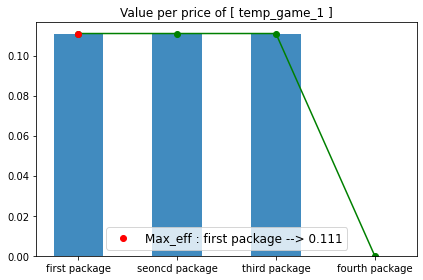

-->In [temp_game_1], [first package] is most efficient.
	==> [first package] is [0.111] valuable per price.


Options : [ 1 ~ 5 ]
[1] : Initialize data
[2] : Manage data
[3] : Read data
[4] : Plot efficency
[5] : Check data status
[6] : Exist program

user input --> 6
------------------------------------------------------------------

Exist program.
Good bye and thank you for using this program.


In [132]:
main()